In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
dataset = pd.read_csv(r"C:\Users\ELCOT\Desktop\HTML\indian_liver_patient.csv")

In [4]:
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
dataset.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [6]:
dataset.shape

(583, 11)

In [7]:
dataset.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [8]:
dataset.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
578    False
579    False
580    False
581    False
582    False
Length: 583, dtype: bool

In [9]:
dataset.duplicated().sum()

13

In [10]:
dataset = dataset.drop_duplicates()
print( dataset.shape )

(570, 11)


In [11]:
dataset.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

<AxesSubplot:xlabel='Albumin_and_Globulin_Ratio'>

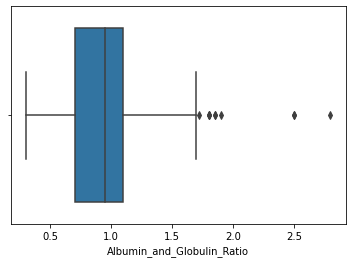

In [12]:
sns.boxplot(data = dataset, x= 'Albumin_and_Globulin_Ratio' )

In [13]:
dataset['Albumin_and_Globulin_Ratio'].mode()

0    1.0
Name: Albumin_and_Globulin_Ratio, dtype: float64

In [14]:
dataset['Albumin_and_Globulin_Ratio'].median()
dataset['Albumin_and_Globulin_Ratio'].mean()

0.9480035335689051

In [15]:
dataset['Albumin_and_Globulin_Ratio'] = dataset['Albumin_and_Globulin_Ratio'].fillna(dataset['Albumin_and_Globulin_Ratio'].median())

In [16]:
dataset.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

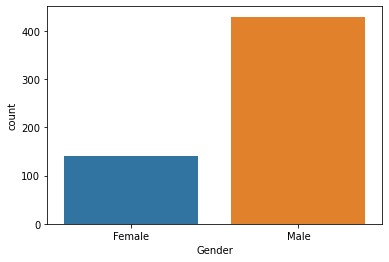

In [17]:
import seaborn as sns
sns.countplot(data = dataset, x='Gender', label='count')

In [18]:
Male, Female = dataset['Gender'].value_counts()
print('Number of patients that are male: ',Male)
print('Number of patients that are female: ',Female)

Number of patients that are male:  430
Number of patients that are female:  140


In [19]:
def partition(x):
    if x == 'Male':
        return 1
    return 0

dataset['Gender'] = dataset['Gender'].map(partition)

In [20]:
dataset

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [21]:
def partition(x):
    if x == 2:
        return 0
    return 1

dataset['Dataset'] = dataset['Dataset'].map(partition)

dataset['Dataset']

0      1
1      1
2      1
3      1
4      1
      ..
578    0
579    1
580    1
581    1
582    0
Name: Dataset, Length: 570, dtype: int64

<AxesSubplot:>

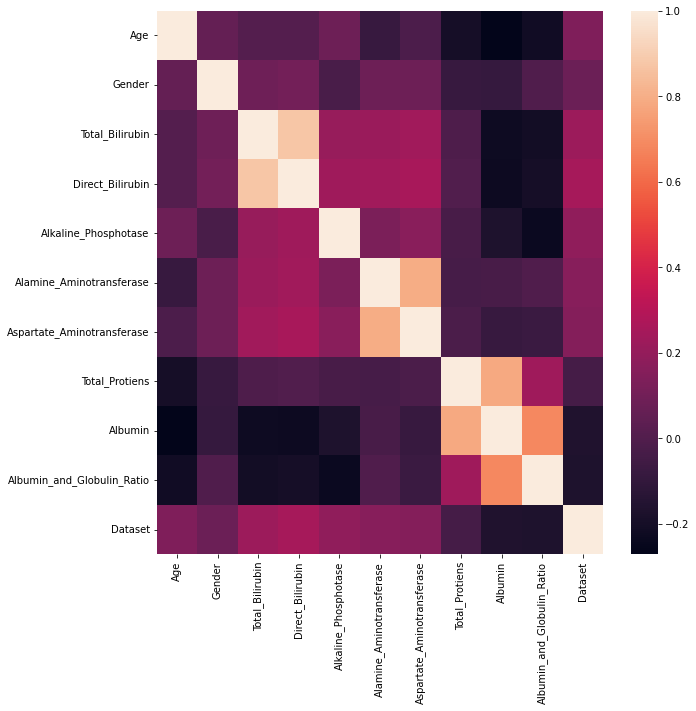

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr())

In [23]:
X = dataset.iloc[: , :-1].values
y = dataset.iloc[: , -1].values

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [25]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(456, 10)
(456,)
(114, 10)
(114,)


In [26]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

svm = SVC()
knn_classifier = KNeighborsClassifier(n_neighbors=5)
RandomForest = RandomForestClassifier(n_estimators=500)
log_classifier = LogisticRegression() 

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [28]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier()
RandomForest = RandomForest.fit(X_train,y_train)


y_pred = RandomForest.predict(X_test)


print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.7017543859649122
[[14 24]
 [10 66]]
              precision    recall  f1-score   support

           0       0.58      0.37      0.45        38
           1       0.73      0.87      0.80        76

    accuracy                           0.70       114
   macro avg       0.66      0.62      0.62       114
weighted avg       0.68      0.70      0.68       114



In [29]:
acc=accuracy_score(y_test,y_pred, normalize=True) * float(100)
print("Accuracy of RandomForestClassifier is (:.2f)%".format(acc))

Accuracy of RandomForestClassifier is (:.2f)%


In [30]:
from sklearn.neighbors import KNeighborsClassifier 
knn_classifier = KNeighborsClassifier() 
knn_classifier = knn_classifier.fit(X_train, y_train)


y_pred = knn_classifier.predict(X_test)

print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.5964912280701754
[[13 25]
 [21 55]]
              precision    recall  f1-score   support

           0       0.38      0.34      0.36        38
           1       0.69      0.72      0.71        76

    accuracy                           0.60       114
   macro avg       0.53      0.53      0.53       114
weighted avg       0.59      0.60      0.59       114



In [31]:
acc=accuracy_score(y_test,y_pred, normalize=True) * float(100)
print("Accuracy of KNeighborsClassifier  is (:.2f)%".format(acc))

Accuracy of KNeighborsClassifier  is (:.2f)%


In [32]:
from sklearn.svm import SVC
svm_classifier = SVC() 
svm_classifier = svm_classifier.fit(X_train, y_train)


y_pred = svm_classifier.predict(X_test)

print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.6666666666666666
[[ 0 38]
 [ 0 76]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.67      1.00      0.80        76

    accuracy                           0.67       114
   macro avg       0.33      0.50      0.40       114
weighted avg       0.44      0.67      0.53       114



In [33]:
acc=accuracy_score(y_test,y_pred, normalize=True) * float(100)
print("Accuracy of SVC is (:.2f)%".format(acc))

Accuracy of SVC is (:.2f)%


In [34]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression() 
log_classifier = log_classifier.fit(X_train, y_train)


y_pred = log_classifier.predict(X_test)

print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.7105263157894737
[[11 27]
 [ 6 70]]
              precision    recall  f1-score   support

           0       0.65      0.29      0.40        38
           1       0.72      0.92      0.81        76

    accuracy                           0.71       114
   macro avg       0.68      0.61      0.60       114
weighted avg       0.70      0.71      0.67       114



In [35]:
acc=accuracy_score(y_test,y_pred, normalize=True) * float(100)
print("Accuracy of LogisticRegression is (:.2f)%".format(acc))

Accuracy of LogisticRegression is (:.2f)%


In [36]:
import pickle
pickle.dump(RandomForest, open('C:/Users/ELCOT/Desktop/HTML/liver.pkl', 'wb'))